In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Defing the appropriate functions

In [ ]:
#def PlotPath(X)

In [198]:
def HypothesisFunction(X, theta):
    return X.dot(theta)


def CostFunction(X, theta, y):
    m = y.shape[0]
    y_hat = HypothesisFunction(X, theta)
    return 1 / m * (y_hat - y).T.dot(y_hat - y)


def ErrorFunction(y_hat, y):
    m = y.shape[0]
    return 1 / m * (y_hat - y).T.dot(y_hat - y)

In [210]:
def BatchGradientDescent(X, y, n_epochs=100, eta=0.1):
    
    m, n = X.shape
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(n, 1)
    #J = CostFunction(X, theta, y)
    #theta_path.append(theta)
    #J_path.append(J)

    for epoch in range(n_epochs):
        
        y_hat = HypothesisFunction(X, theta)
        
        gradients = 2 / m * X.T.dot(y_hat - y)
        theta -= eta * gradients
        J = ErrorFunction(y_hat, y)
        
        theta_path.append(theta)
        J_path.append(J)
        
    # end for epoch

    
    return np.array(theta_path), np.array(J_path)



In [203]:

def StochasticGradientDescent(X, y, n_epochs=100, eta=0.1):
    
    def learning_schedule(t, t0=1, t1=10):
        return t0 / (t + t1)
    
    m, n = X.shape
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(n, 1)
    #J = CostFunction(X, theta, y)

    t = 0
    for epoch in range(n_epochs):
        for i in range(m):
            t += 1
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]

            yi_hat = HypothesisFunction(xi, theta)

            gradients = 2 * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients   
        # end for i
        
           
        J = ErrorFunction(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
    
    # end for epoch
    
    return np.array(theta_path), np.array(J_path)


In [204]:
def MiniBatchGradientDescent(X, y, n_epochs=100, eta=0.1, minibatch_size=20):
    
    def learning_schedule(t, t0=1, t1=10):
        return t0 / (t + t1)
    
    m, n = X.shape
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(n, 1)
    #J = CostFunction(X, theta, y)

    t = 0
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            t += 1

            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            yi_hat = HypothesisFunction(xi, theta)

            gradients = 2 / minibatch_size * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            
        # end for i
        
        J = ErrorFunction(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
        
    # end for epoch
    
    return np.array(theta_path), np.array(J_path)
    

# Defing input data

In [212]:
m = 100 # size of the dataset

np.random.seed(42)
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m,1)

X_b = np.c_[np.ones((m, 1)), X]

theta_path_bgd, J_path_bgd = BatchGradientDescent(X_b, y)
theta_path_sgd, J_path_sgd = StochasticGradientDescent(X_b, y)
theta_path_mbg, J_path_mbg = MiniBatchGradientDescent(X_b, y)


# Plot parts

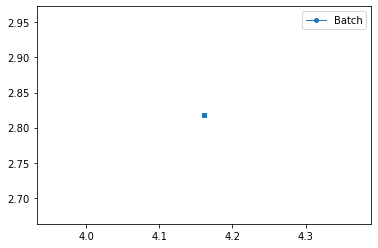

In [213]:
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], label='Batch', 
         marker='o', lw=1, markersize=4)
#plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], label='Stochastic',
#         marker='s', lw=1, markersize=4)


#plt.plot(theta_path_mbg[:,0], theta_path_mbg[:,1], label='Mini-batch',
#         marker='v', lw=1, markersize=4)


#plt.xlim((1, 4.3))
plt.legend(loc='best')

# The automatic batch size adaptor